# Covid-19 Data Analysis 

### Chapters

* İmport Python Libraries
* Data Exploration
* Data Cleaning
* Data Visualizing

# İmport Python Libraries

In [420]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split

%matplotlib inline

# Data Exploration

In [421]:
df = pd.read_excel('data/owid-covid-data.xlsx', index_col='iso_code')

In [422]:
df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [423]:
df.shape

(59704, 54)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59704 entries, AFG to ZWE
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   continent                              59006 non-null  object 
 1   location                               59704 non-null  object 
 2   date                                   59704 non-null  object 
 3   total_cases                            59154 non-null  float64
 4   new_cases                              59147 non-null  float64
 5   new_cases_smoothed                     58192 non-null  float64
 6   total_deaths                           50743 non-null  float64
 7   new_deaths                             50742 non-null  float64
 8   new_deaths_smoothed                    58192 non-null  float64
 9   total_cases_per_million                58813 non-null  float64
 10  new_cases_per_million                  58806 non-null  float64
 11  new_cas

In [425]:
#Randomly checking columns and I find this one contains (-) value
df['new_cases'].value_counts()


 0.0       13662
 1.0        2057
 2.0        1344
 3.0        1025
 4.0         852
           ...  
 6045.0        1
 6073.0        1
 6113.0        1
 6283.0        1
-6.0           1
Name: new_cases, Length: 7040, dtype: int64

# Data Cleaning

In [426]:
#Dropping indexis with missing values

df = df[df.index.notnull()]


In [427]:
#We can see here for countries first new death entries and total deaths null.
#Null values can be changed with 0 (integer).

df[pd.isnull(df['total_deaths'])].tail(25)



,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
YEM,Asia,Yemen,2020-04-23,1.0,0.0,0.000,NaN,NaN,0.0,0.034,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
YEM,Asia,Yemen,2020-04-24,1.0,0.0,0.000,NaN,NaN,0.0,0.034,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
YEM,Asia,Yemen,2020-04-25,1.0,0.0,0.000,NaN,NaN,0.0,0.034,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
YEM,Asia,Yemen,2020-04-26,1.0,0.0,0.000,NaN,NaN,0.0,0.034,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
YEM,Asia,Yemen,2020-04-27,1.0,0.0,0.000,NaN,NaN,0.0,0.034,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
YEM,Asia,Yemen,2020-04-28,1.0,0.0,0.000,NaN,NaN,0.0,0.034,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
YEM,Asia,Yemen,2020-04-29,6.0,5.0,0.714,NaN,NaN,0.0,0.201,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
ZMB,Africa,Zambia,2020-03-18,2.0,2.0,NaN,NaN,NaN,NaN,0.109,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.588
ZMB,Africa,Zambia,2020-03-19,2.0,0.0,NaN,NaN,NaN,NaN,0.109,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.588


In [428]:
#Some columns like new_cases, population data types need to be an integer
#But firstly, columns missing values need to be restored


columns1 = ['total_cases','new_cases', 'total_deaths', 'new_deaths', 'population']
for i in columns1:
    df[i] = df[i].fillna(0)                          #Change null values with 0
    df[i] = pd.to_numeric(df[i], downcast='signed')  #Change data type to integer
    df[i] = df[i].abs()                              #Geting absoulute value, if negative value is exist

    
df['life_expectancy'] = df['life_expectancy'].fillna(72.495)         #Only missing value in life expect. was Kosova and I found this info from data.worldbank.org

In [429]:
#Date columns data type is converted to date
df['date'] = pd.to_datetime(df['date'])


#Checking update
df['date'].describe


<bound method NDFrame.describe of iso_code
AFG   2020-02-24
AFG   2020-02-25
AFG   2020-02-26
AFG   2020-02-27
AFG   2020-02-28
         ...    
ZWE   2021-01-08
ZWE   2021-01-09
ZWE   2021-01-10
ZWE   2021-01-11
ZWE   2021-01-12
Name: date, Length: 59363, dtype: datetime64[ns]>

In [430]:
#Checking row numbers. İf we have duplicate rows this values are need to be different 

print('Row number without duplicate: ' + str(len(df.drop_duplicates(subset=['location', 'date', 'new_cases'])))) 
print('Row number with duplicate: '+ str(len(df.index)))

Row number without duplicate: 59363
Row number with duplicate: 59363


In [431]:
#Down here we can see df has index for WORLD but I am doing analysis for countries
#And Honk Kong has no data. 
#Need to drop these 2 rows

df.groupby('location')['new_cases'].agg([sum, max]).sort_values('sum', ascending=False)


,sum,max
location,,
World,90770603,862067
United States,22838109,302506
India,10495147,97894
Brazil,8195637,87843
Russia,3412390,29499
...,...,...
Solomon Islands,17,5
Marshall Islands,6,3
Samoa,2,1


In [432]:
#Dropping cloumn for [can see in previous cell]
dr = ['OWID_WRL', 'HKG']
for i in dr:
    df = df.drop(i, axis=0)



In [433]:
#Grouping data for visualizings

analy=df.groupby('location').sum()
analy.head(2)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9119891,53584,53378.567,324261,2301.0,2269.140,234273.820,1376.490,1371.200,8329.699,...,584491.788,0.0,193437.396,3107.16,0.0,0.0,12229.704,162.0,21004.92,161.352
Albania,4464512,64627,62891.003,102991,1252.0,1234.301,1551362.849,22457.082,21853.844,35788.094,...,3659063.610,341.0,94300.450,3124.80,2201.0,15872.0,0.000,895.9,24356.70,243.350


# Data Visualizing

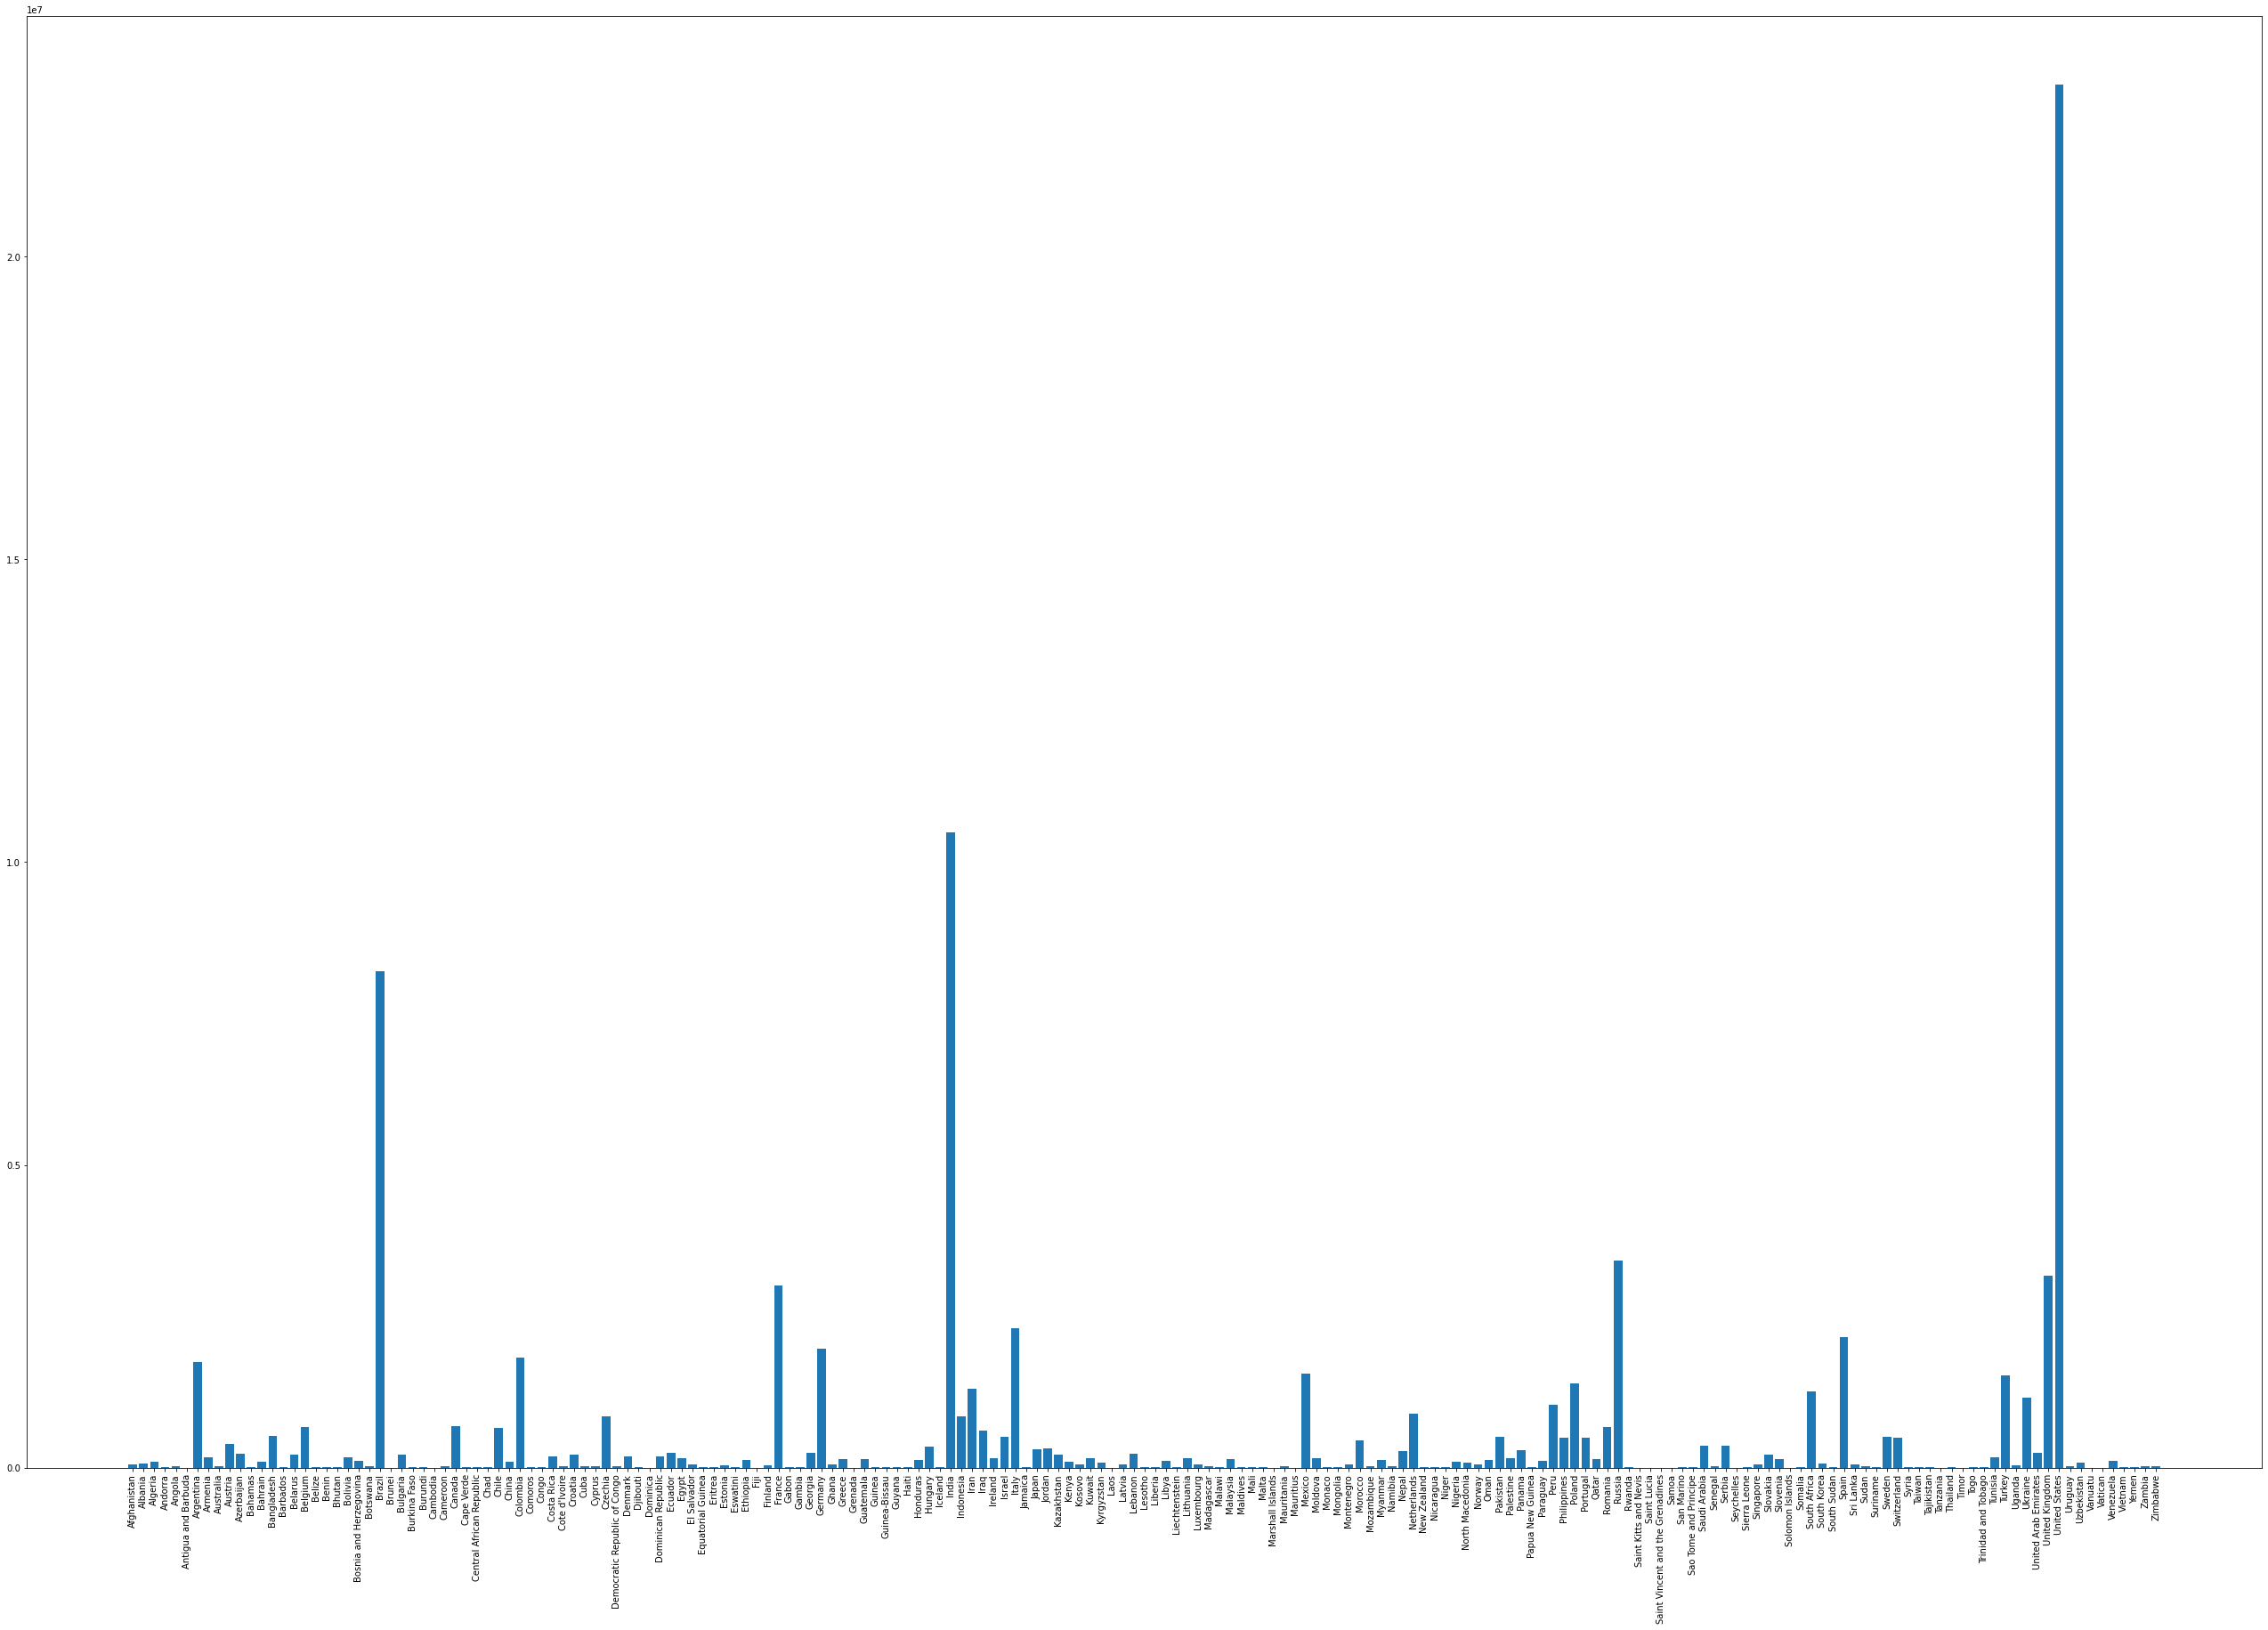

In [434]:
#First impressions
plt.figure(figsize=(45,30))
plt.bar(analy.index, analy['new_cases'])
plt.xticks(analy.index, rotation='vertical')
plt.show()

### Finding countries with most patients

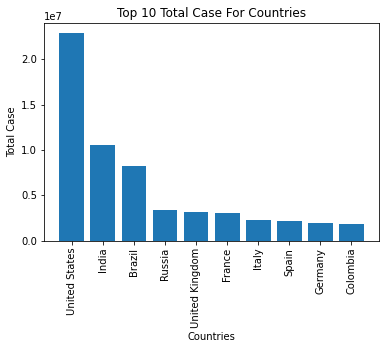

In [435]:
#Sorting and limiting rows for better plotting
analy2 = pd.DataFrame(analy['new_cases'].sort_values(ascending=False).head(10))

plt.bar(analy2.index, analy2['new_cases'])
plt.title('Top 10 Total Case For Countries')
plt.xlabel('Countries')
plt.ylabel('Total Case')
plt.xticks(analy2.index,rotation='vertical')
plt.show()

### Finding countries with most deaths

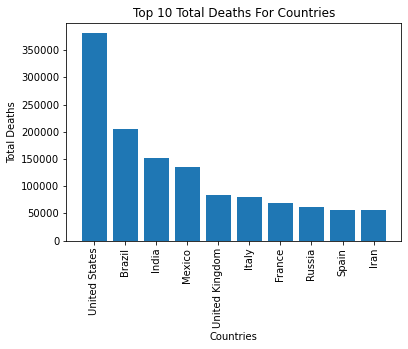

In [436]:
analy3 = pd.DataFrame(analy['new_deaths'].sort_values(ascending=False).head(10))

plt.bar(analy3.index, analy3['new_deaths'])
plt.title('Top 10 Total Deaths For Countries')
plt.xlabel('Countries')
plt.ylabel('Total Deaths')
plt.xticks(analy3.index,rotation='vertical')
plt.show()

### Finding countries with most death rates

In [437]:
#Finding death rate for every country
#New_cases and deaths columns are now contains total values.

analy['Death Rate'] = round((1-((analy['new_cases']-analy['new_deaths'])/analy['new_cases']))*100,2)

#Checking result

analy.loc[['United States'],['Death Rate']]

,Death Rate
location,
United States,1.67


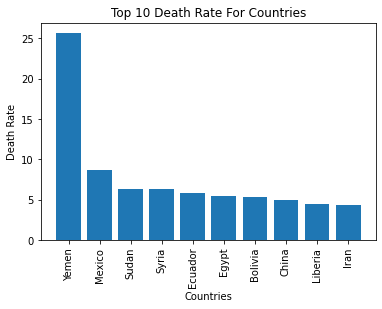

In [438]:
#Plot for Top 10 death rate
analy4 = pd.DataFrame(analy['Death Rate'].sort_values(ascending=False).head(10))

plt.bar(analy4.index, analy4['Death Rate'])
plt.title('Top 10 Death Rate For Countries')
plt.xlabel('Countries')
plt.ylabel('Death Rate')
plt.xticks(analy4.index,rotation='vertical')
plt.show()


### Finding indicators for death rate

In [581]:
rdif = analy.loc[['Yemen', 'Mexico','Sudan','Syria','Ecuador']]
cdif = analy.loc[['United States','India','Brazil','Russia','United Kingdom']]

cmdif = rdif.append(cdif, ignore_index=True)


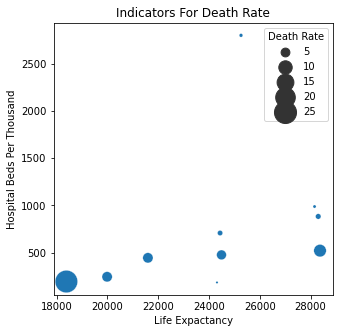

In [582]:
plt.figure(figsize=(5,5))
plt.title('Indicators For Death Rate')
plt.xlabel('Life Expactancy')
plt.ylabel('Hospital Beds Per Thousand')
sns.scatterplot(x=cmdif['life_expectancy'], y=cmdif['hospital_beds_per_thousand'], size=cmdif['Death Rate'], sizes=(5, 500))
plt.show()

### Turkey's death total in first month

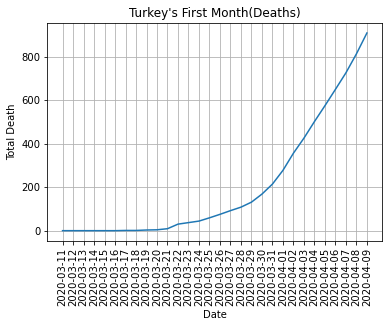

In [577]:
pltr = df[df['location']=='Turkey'].head(30)
pltr = pltr.reset_index()

sns.lineplot(x=pltr['date'],y=pltr['total_deaths'])
plt.title('Turkey\'s First Month(Deaths)')
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.xticks(pltr['date'],rotation='vertical')
plt.grid()
plt.show()


### US's death total in second and third month

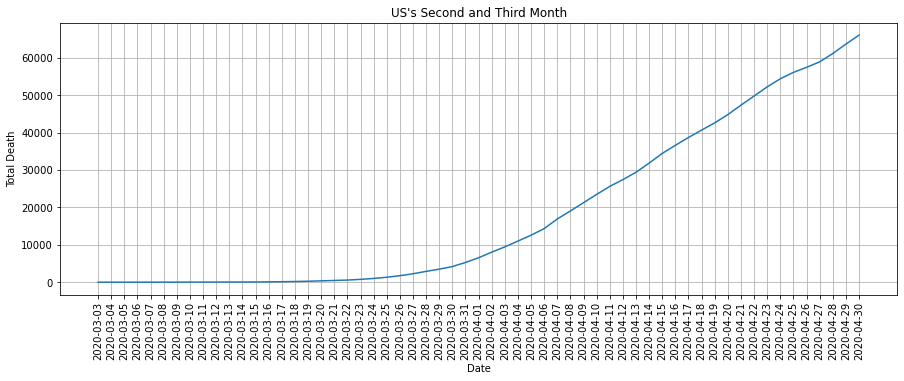

In [578]:
plus = df[df['location']=='United States'].head(100)
plus = plus.reset_index()
plus = plus.drop(np.arange(41),axis = 'index')

plt.figure(figsize=(15,5))
sns.lineplot(x=plus['date'],y=plus['total_deaths'])
plt.title('US\'s Second and Third Month')
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.xticks(plus['date'],rotation='vertical')
plt.grid()
plt.show()


### Finding correlation and ploting

In [439]:
#Getting means for columns

analy5 = df.groupby(['location']).mean()
analy5 = analy5[['new_cases','new_deaths', 'population', 'gdp_per_capita', 'cardiovasc_death_rate', 'life_expectancy']]

#Dropping NA values 

analy5 = analy5.dropna(subset=['gdp_per_capita', 'cardiovasc_death_rate'])

#Rename column names with mean + column _name

analy5 = analy5.rename(columns = {'new_cases':'daily_case_mean', 'new_deaths':'daily_death_mean'})

#Creating list for total case and death from previous dataFrame for concate with df which contains mean values
lst = ['new_cases', 'new_deaths']

#With loop adding total columns
for i in lst:
    analy5[i] = analy[i]
    
#Rename column names with total + column _name

analy5 = analy5.rename(columns = {'new_cases':'total_case', 'new_deaths':'total_death'})

In [440]:
analy5.head()

,daily_case_mean,daily_death_mean,population,gdp_per_capita,cardiovasc_death_rate,life_expectancy,total_case,total_death
location,,,,,,,,
Afghanistan,165.382716,7.101852,38928341.0,1803.987,597.029,64.83,53584,2301.0
Albania,208.474194,4.038710,2877800.0,11803.431,304.195,78.57,64627,1252.0
Algeria,317.773994,8.718266,43851043.0,13913.839,278.364,76.88,102641,2816.0
Angola,61.347826,1.431438,32866268.0,5819.495,276.045,61.15,18343,428.0
Antigua and Barbuda,0.581699,0.016340,97928.0,21490.943,191.511,77.02,178,5.0


In [441]:
analy5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   daily_case_mean        178 non-null    float64
 1   daily_death_mean       178 non-null    float64
 2   population             178 non-null    float64
 3   gdp_per_capita         178 non-null    float64
 4   cardiovasc_death_rate  178 non-null    float64
 5   life_expectancy        178 non-null    float64
 6   total_case             178 non-null    int32  
 7   total_death            178 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 11.8+ KB


In [442]:
corelation = analy5.corr()
corelation

,daily_case_mean,daily_death_mean,population,gdp_per_capita,cardiovasc_death_rate,life_expectancy,total_case,total_death
daily_case_mean,1.000000,0.956505,0.419359,0.155737,-0.126574,0.145968,0.999379,0.957695
daily_death_mean,0.956505,1.000000,0.375423,0.149861,-0.166667,0.176087,0.952201,0.998820
population,0.419359,0.375423,1.000000,-0.041785,-0.006660,0.006181,0.416813,0.374956
gdp_per_capita,0.155737,0.149861,-0.041785,1.000000,-0.469472,0.663376,0.157374,0.152942
cardiovasc_death_rate,-0.126574,-0.166667,-0.006660,-0.469472,1.000000,-0.448189,-0.125741,-0.166470
life_expectancy,0.145968,0.176087,0.006181,0.663376,-0.448189,1.000000,0.143226,0.173754
total_case,0.999379,0.952201,0.416813,0.157374,-0.125741,0.143226,1.000000,0.954992
total_death,0.957695,0.998820,0.374956,0.152942,-0.166470,0.173754,0.954992,1.000000


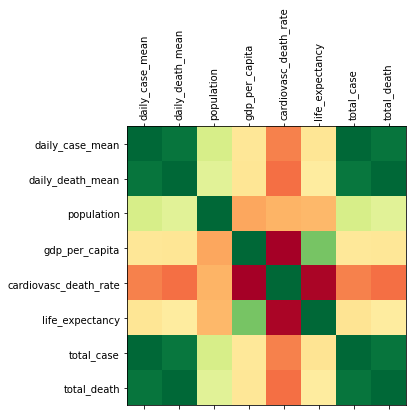

In [443]:
#Plotting correlation

fig = plt.figure(figsize=(5,5))
plt.matshow(corelation, cmap= 'RdYlGn', fignum= fig.number)
plt.xticks(range(len(corelation.columns)), corelation.columns, rotation='vertical')
plt.yticks(range(len(corelation.columns)), corelation.columns)
plt.show()